In [1]:
from IPython.display import Image

import dinkum
from dinkum.vfg import Gene, Receptor
from dinkum.vfn import Tissue
from dinkum import Timecourse
from dinkum import observations

from dinkum.display import MultiTissuePanel, tc_record_activity

## double negative gate

TODO:
- add tissue name

start=1 stop=8


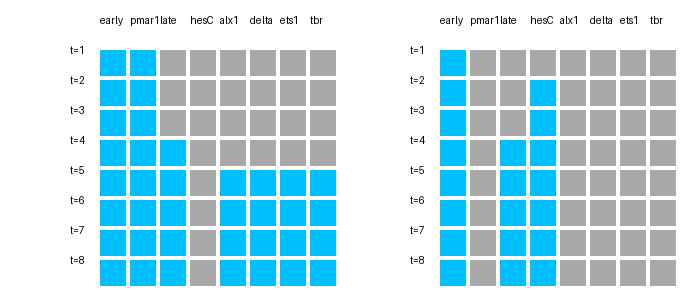

In [2]:
dinkum.reset()

# set it all up!                                                            
pmar1 = Gene(name='pmar1')
hesC = Gene(name='hesC')
alx1 = Gene(name='alx1')
delta = Gene(name='delta')
tbr = Gene(name='tbr')
ets1 = Gene(name='ets1')

embryo = Tissue(name='rest of embryo')
micromere = Tissue(name='micromeres')

# maternal genes
early_ubiq = Gene(name='early')
late_ubiq = Gene(name='late')

# @CTB: chain??

## set up maternal gene expression

# early ubiq
early_ubiq.is_present(where=micromere, start=1)
early_ubiq.is_present(where=embryo, start=1)

# late ubiq
late_ubiq.is_present(where=micromere, start=4)
late_ubiq.is_present(where=embryo, start=4)

# pmar1: maternal in micromeres only
pmar1.is_present(where=micromere, start=1)

## set up all downstream genes


# hesC: early, if not for pmar1
hesC.and_not(activator=early_ubiq, repressor=pmar1)

# alx &c: late, if not for hesC
alx1.and_not(activator=late_ubiq, repressor=hesC)
delta.and_not(activator=late_ubiq, repressor=hesC)
tbr.and_not(activator=late_ubiq, repressor=hesC)
ets1.and_not(activator=late_ubiq, repressor=hesC)

states, tissues, is_active_fn = tc_record_activity(stop=8)

mp = MultiTissuePanel(states=states, tissue_names=['micromeres', 'rest of embryo'],
                      genes_by_name=[early_ubiq.name, pmar1.name, late_ubiq.name, hesC.name])
mp.draw(is_active_fn)